In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load
dat = pd.read_csv('../../final_data/fulldata_cleaned_matched_GPT_colors.csv')
red_validated = pd.read_csv('../../final_data/validated_FULL_gpt_labeled_REDS_ONLY.csv')

/var/folders/qh/c7rwx84921n2kznn09zb2pnh0000gn/T/ipykernel_76038/1495183986.py:7: DtypeWarning: Columns (14,29) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv('../../final_data/fulldata_cleaned_matched_GPT_colors.csv')


In [2]:
# how many are labeled red?
num_in_red_labels = sum(dat['binomial'].isin(red_validated['binomial']))
truereds = red_validated.loc[red_validated['validated'] == 'yes', 'binomial']
num_in_red_true = sum(dat['binomial'].isin(truereds))

# use the hand-validated reds to screen out non-reds
not_red_sp = red_validated.loc[red_validated['validated'] == 'no', 'binomial']
dat.loc[dat['binomial'].isin(not_red_sp), 'color'] = np.nan
dat = dat.dropna(subset=['color'])

In [3]:
# subset rows
subset_df = dat[dat['color'].isin(['red','orange', 'white'])]

In [4]:
# only want part of the year
subset_df = subset_df[subset_df.day_of_year < 200]

In [5]:
# only east
subset_df = subset_df[subset_df.longitude>-96]

In [6]:
# combined hummingbird colors
subset_df.loc[subset_df.color.isin(['orange', 'red']), 'color'] = 'red/orange'

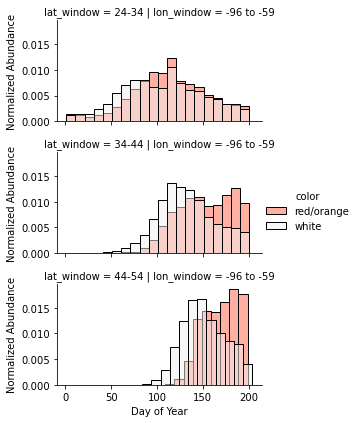

In [7]:
# lon windows
# now just east
subset_df['lon_window'] = pd.cut(subset_df['longitude'],
    bins=[-96, -59],  # Adjust these as needed
    labels=["-96 to -59"])

# lat windows
subset_df['lat_window'] = pd.cut(subset_df['latitude'],
    bins=[24,34, 44, 54],
    labels=["24-34", "34-44","44-54"])

# convert color to categorical (this threw an error otherwise)
subset_df['color'] = pd.Categorical(subset_df['color'])

# custom colors for fill
custom_colors = {"red/orange": "#FF6347", "white": "#F0F0F0"}

# plot hists
g = sns.FacetGrid(subset_df, row="lat_window", col="lon_window", hue="color", height=2, aspect=2, palette=custom_colors)
g.map(sns.histplot, "day_of_year", stat="density", binwidth=10, alpha=0.5, kde=False)

# labels
g.set_axis_labels("Day of Year", "Normalized Abundance")
g.add_legend()

# save
plt.savefig('histograms.pdf', dpi=600, bbox_inches='tight', format='pdf')
plt.show()